In [1]:
import pandas as pd
import numpy as np
from os import path

from scipy.signal import resample

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_theme(style="whitegrid")
mpl.style.use('seaborn-notebook')
sorted(mpl.style.available)


#adding local modules
import sys
module_path = path.abspath(path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from preprocess.biodarw_feature_extraction import extract_residues, extract_radio
from loaders.biodarw import load_arquimedes_dataset

# setting up variables
doc_path = "/data/elekin/doc"
coefficients=17
et = "T001"
ct ="C01"
features = ['x', 'y', 'timestamp', 'pen_up', 'azimuth', 'altitude', 'pressure']

%matplotlib inline

In [2]:
metadf=pd.read_csv(path.join("/data/elekin/doc","metadata-202106-v1.csv"),index_col=0)
#missing level value with 1
metadf.level=metadf.level.fillna(1)
#delete subjects without TRS
metadf=metadf[~metadf.TRS.isna()]
metadf.count()

abs_path         50
relative_path    50
temblor          50
Sexo             46
TRS              50
age              50
level            50
dtype: int64

In [3]:
def read(filename):
    df = pd.read_csv(filename, sep="\s+", header=None, names=features, skiprows=1)
    return df

In [4]:
dataset = None
for i, filename in zip(metadf.index, metadf["abs_path"]) :
    tmp_df = read(filename)
    tmp_df['subject_id'] = i
    dataset = pd.concat([tmp_df,dataset])
tmp_df.head(10)

,x,y,timestamp,pen_up,azimuth,altitude,pressure,subject_id
0,3880,5330,1368624260328,1,120,590,1229,C107_2
1,3870,5330,1368624260359,1,120,590,1229,C107_2
2,3870,5330,1368624260531,0,120,590,0,C107_2
3,5310,7740,1368624263405,0,120,590,0,C107_2
4,5306,7747,5208200,0,2620,520,0,C107_2
5,5306,7747,5208207,0,2620,530,0,C107_2
6,5306,7748,5208215,0,2620,530,0,C107_2
7,5309,7751,5208222,0,2620,530,0,C107_2
8,5316,7756,5208230,0,2620,530,0,C107_2
9,5325,7764,5208237,0,2620,530,0,C107_2


In [5]:
r = dataset.groupby('subject_id').apply(extract_radio).apply(resample, num=4096)
rd = dataset.groupby('subject_id').apply(extract_residues, c=coefficients).apply(resample, num=4096)
rd.head(10)

subject_id
C01_1    [7.349452135538814e-15, -13.291940347957633, 1...
C01_2    [6.756754382672781e-14, -31.209052718020665, -...
C02_1    [3.542766945433196e-14, -60.542107171840655, -...
C02_2    [0.0, -27.96829760698023, 3.8470429672404, 19....
C03_1    [-1.4486724966019762e-13, -24.21752524435715, ...
C03_2    [-3.216603719798155e-14, -4.7430528895370925, ...
C04_1    [1.2759241760952961e-14, -19.238670114026245, ...
C04_2    [-8.748646429879872e-14, -6.63962490169419, 7....
C05_1    [0.0, -27.907347281976882, 10.881925912223965,...
C05_2    [7.349452135538813e-14, -55.60480039587575, 20...
dtype: object

In [6]:
dataset[dataset["subject_id"]=="C106_1"]

,x,y,timestamp,pen_up,azimuth,altitude,pressure,subject_id
0,4060,5320,1368623359343,1,400,370,1229,C106_1
1,4060,5320,1368623359484,0,400,370,0,C106_1
2,5450,2540,1368623368937,0,400,370,0,C106_1
3,5446,2549,4314009,0,610,610,0,C106_1
4,5446,2549,4314016,0,610,610,0,C106_1
...,...,...,...,...,...,...,...,...
3206,5664,3861,4346462,1,90,770,1944,C106_1
3207,5664,3861,4346469,1,90,770,1858,C106_1
3208,5664,3861,4346477,1,90,770,1684,C106_1
3209,5664,3861,4346484,1,90,770,1317,C106_1


In [7]:
rd_df = pd.DataFrame(rd.tolist(), index=rd.index)
rd_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
subject_id,,,,,,,,,,,,,,,,,,,,,
C01_1,7.349452e-15,-13.291940,1.024601,10.161138,3.315941,-3.097414,1.440666,7.129718,4.707049,0.572884,...,97.448900,95.955542,101.818591,104.332167,95.874072,89.940103,101.853141,116.800260,101.116099,49.724857
C01_2,6.756754e-14,-31.209053,-0.017404,17.752622,1.237945,-9.987982,2.213369,11.402657,2.611116,-4.204175,...,222.096143,213.065104,221.689744,232.912255,220.952794,204.349330,222.760910,255.393283,225.934430,113.379869
C02_1,3.542767e-14,-60.542107,-27.549071,22.667162,29.774608,-0.049968,-21.247772,-10.065639,13.253232,17.932418,...,344.367840,374.472317,380.804964,362.103375,356.832894,397.935247,458.875221,461.692858,352.041872,164.092353
C02_2,0.000000e+00,-27.968298,3.847043,19.568139,4.392351,-0.129432,17.771599,29.816480,28.274217,34.182908,...,214.985799,204.703211,209.397646,222.910419,215.988709,197.589052,209.616093,241.172176,216.979362,109.734380
C03_1,-1.448672e-13,-24.217525,0.030620,15.214947,2.708331,-8.058323,0.193426,9.060716,3.685560,-3.239162,...,110.591346,104.897082,115.563854,127.342230,121.951827,117.953167,145.015919,181.972929,167.326704,85.417298
C03_2,-3.216604e-14,-4.743053,2.357251,4.825403,1.856053,3.416943,9.272533,11.910841,11.251721,11.652002,...,36.862525,35.561624,34.204905,36.363264,37.555728,34.273989,33.939043,40.137283,39.286630,21.104560
C04_1,1.275924e-14,-19.238670,4.887121,9.269133,-5.603701,-4.442068,5.761753,2.020816,-4.567960,0.597289,...,77.518802,72.292842,64.360034,75.220587,89.323213,86.753011,95.350440,133.114825,143.943629,80.689566
C04_2,-8.748646e-14,-6.639625,7.783162,-1.958290,-0.019630,4.697744,-0.645690,3.079784,4.094312,2.093642,...,82.562342,79.182332,82.388434,82.390361,78.429148,85.139955,80.384840,77.471092,93.832116,63.282700
C05_1,0.000000e+00,-27.907347,10.881926,10.252521,-11.110835,-1.430228,9.070397,-2.783219,-4.909954,5.666420,...,107.457379,118.450235,114.096347,128.871858,158.741696,158.948752,160.007117,212.835150,236.414668,134.861681


Loading labels based on clinic, residues and features from residues.


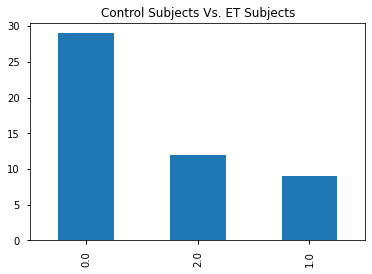

In [8]:
y = metadf['level']
ax = y.value_counts().plot.bar(title='Control Subjects Vs. ET Subjects')


## Residues Analysis based on Pearson Correlation

As the first step we can try to visualy identify correlation between features and also with target class

0.003194986805520436

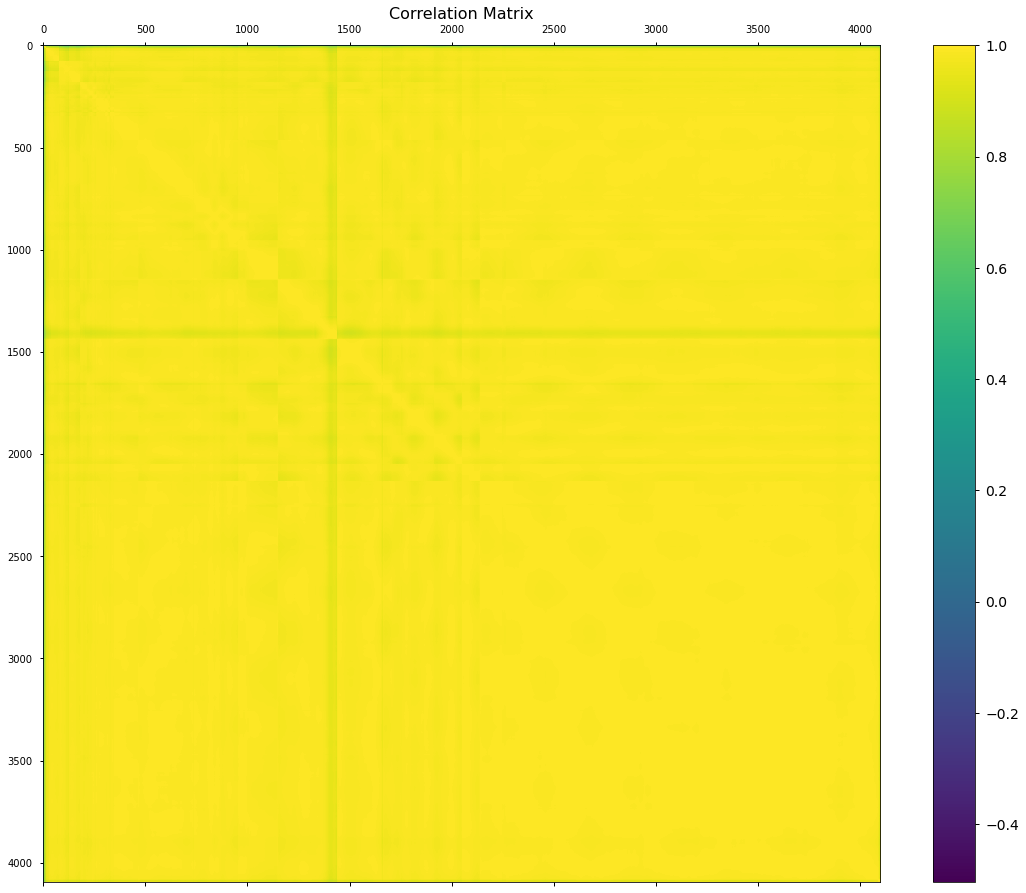

In [9]:
df=rd_df
f = plt.figure(figsize=(19, 15))
corrMatrix = df.corr("pearson")
plt.matshow(corrMatrix, fignum=f.number, cmap="viridis")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
corrMatrix.abs().min().min()

0.7689551932128241

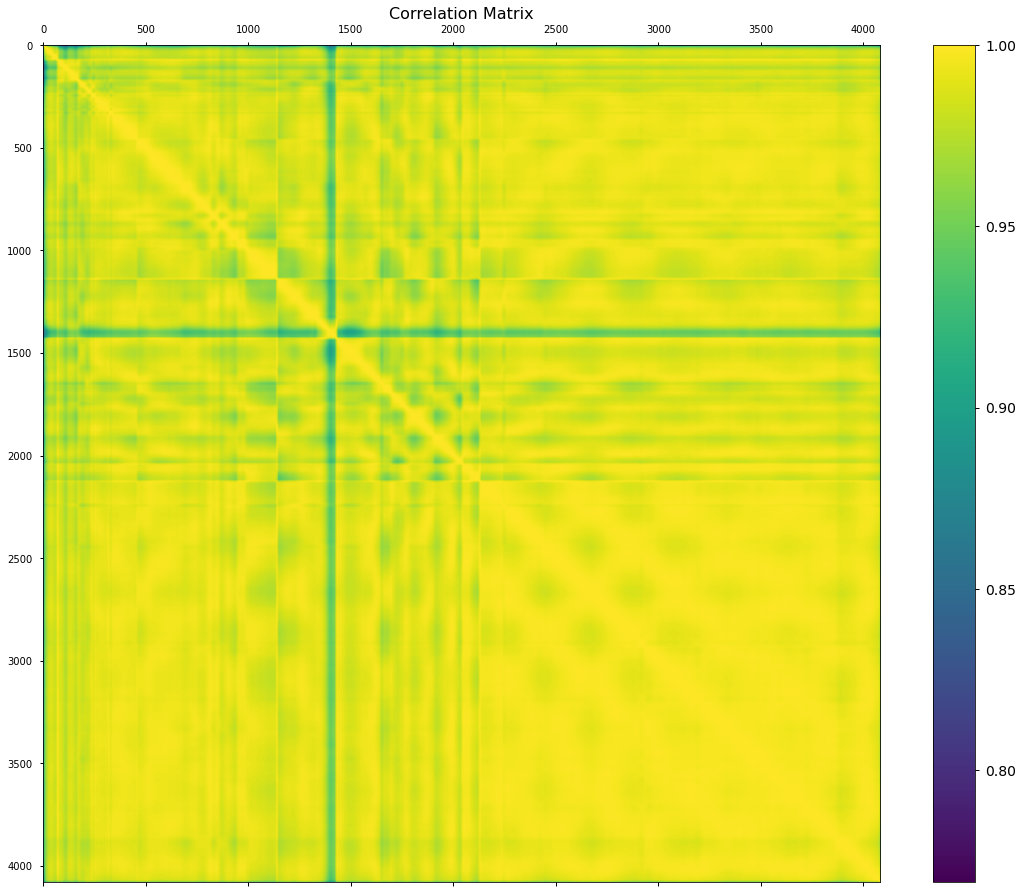

In [10]:
denom = 256
l = len(rd_df.T)
f = plt.figure(figsize=(19, 15))

corrMatrix = rd_df.rolling(round(l/denom), axis=1).mean().dropna(axis=1).corr("pearson")

plt.matshow(corrMatrix, fignum=f.number, cmap="viridis")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

corrMatrix.abs().min().min()

In [11]:
rd_df.index

Index(['C01_1', 'C01_2', 'C02_1', 'C02_2', 'C03_1', 'C03_2', 'C04_1', 'C04_2',
       'C05_1', 'C05_2', 'C06_1', 'C06_2', 'C07_1', 'C07_2', 'C08', 'C101_1',
       'C101_2', 'C102_1', 'C102_2', 'C103_1', 'C103_2', 'C104_1', 'C104_2',
       'C106_1', 'C106_2', 'C107_1', 'C107_2', 'T001', 'T002_1', 'T002_2',
       'T005', 'T006', 'T008', 'T009', 'T010', 'T012_1', 'T012_2', 'T013',
       'T014', 'T015', 'T018', 'T021', 'T023_1', 'T023_2', 'T025', 'T026',
       'T027', 'T028_1', 'T028_2', 'T029'],
      dtype='object', name='subject_id')

0.015428256763598911

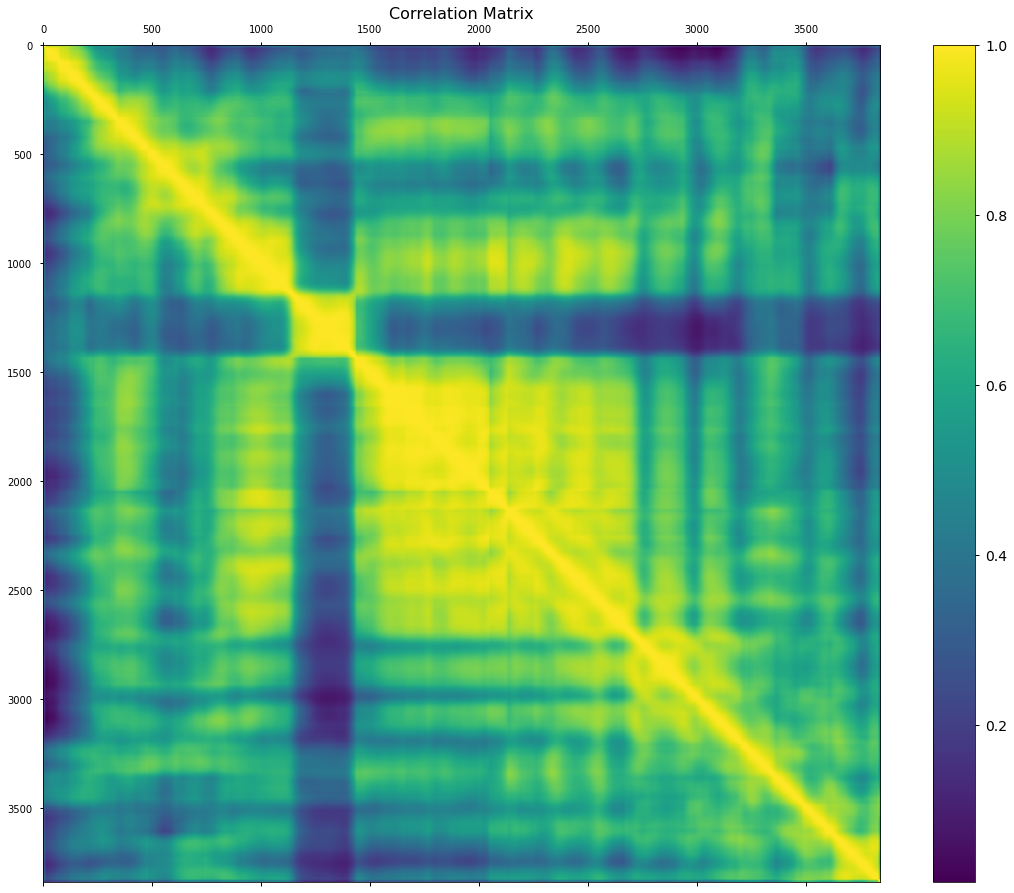

In [12]:
denom = 16
l = len(rd_df.T)
corrMatrix = rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).corr("pearson")
f = plt.figure(figsize=(19, 15))
plt.matshow(corrMatrix, fignum=f.number, cmap="viridis")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
corrMatrix.abs().min().min()

1.266223039127808e-06

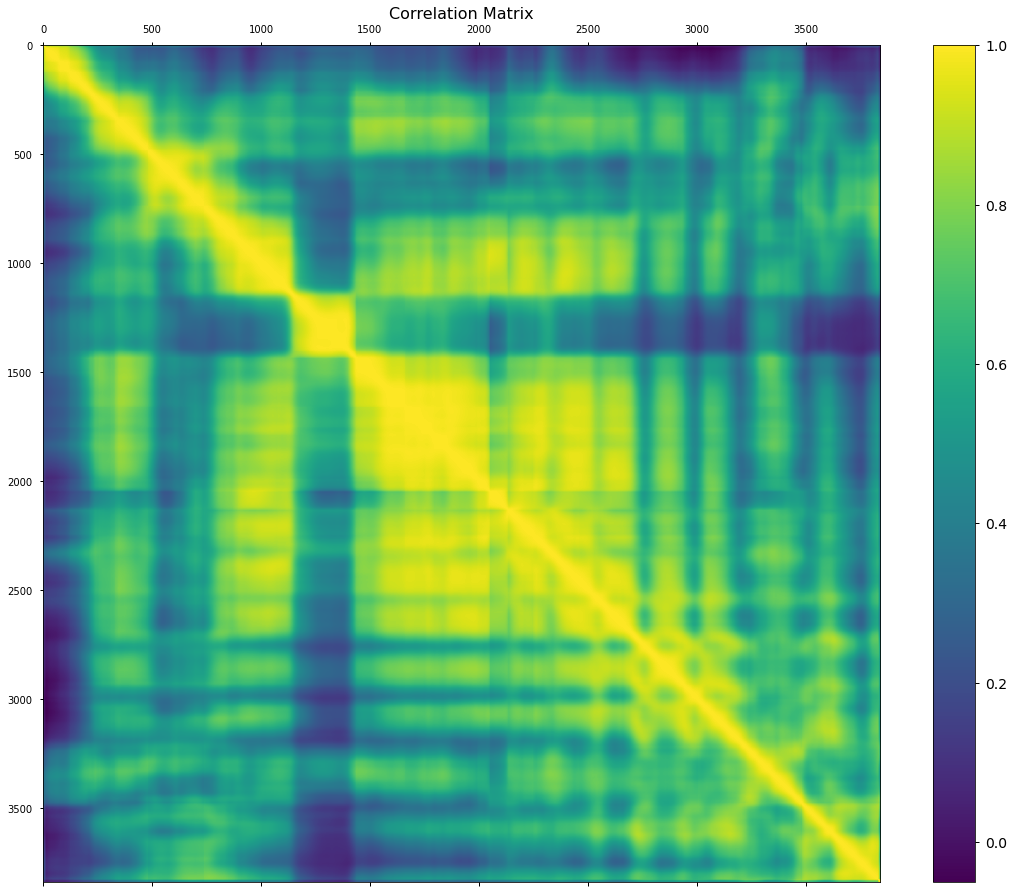

In [13]:
denom = 16
l = len(rd_df.T)
corrMatrix=rd_df.diff().dropna().rolling(round(l/denom), axis=1).std().dropna(axis=1).corr("pearson")
f = plt.figure(figsize=(19, 15))
plt.matshow(corrMatrix, fignum=f.number, cmap="viridis")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
corrMatrix.abs().min().min()

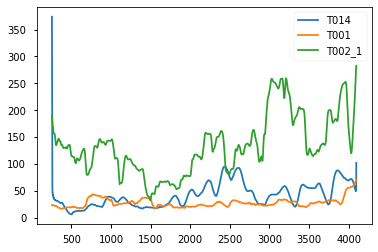

In [14]:
rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["T014"].plot(legend=True)
rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["T001"].plot(legend=True)
_=rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["T002_1"].plot(legend=True)


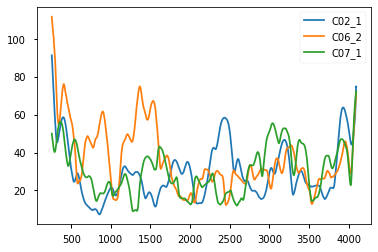

In [15]:
rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["C02_1"].plot(legend=True)
rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["C06_2"].plot(legend=True)
_=rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1).loc["C07_1"].plot(legend=True)

There is strong correlation between all the data points

In [16]:
labels = metadf["level"]
labels.values.astype('int8').shape

(50,)

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
random_state = 0

X_train=rd_df.rolling(round(l/denom), axis=1).std().dropna(axis=1)
y_train=labels.values

In [18]:
# Reduce dimension with LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
X_train_lda=lda.transform(X_train)

In [19]:
df_lda=pd.DataFrame(X_train_lda, columns=["LDA1", "LDA2"])
df_lda["labels"]=y_train.T
df_lda.head()

,LDA1,LDA2,labels
0,-0.108605,-0.278627,0.0
1,-1.624866,0.417530,0.0
2,-0.147688,1.447551,0.0
3,0.870042,1.479474,0.0
4,0.269341,3.211288,0.0


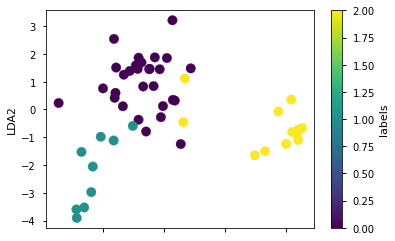

In [20]:
ax=df_lda.plot.scatter(x="LDA1", y="LDA2", c="labels", s=90, cmap="viridis", legend=True)

In [21]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=3, random_state=random_state))
# Fit the method's model
pca.fit(X_train, y_train)
X_train_pca=pca.transform(X_train)

In [22]:
df_pca=pd.DataFrame(X_train_pca[:,:3], columns=["component1", "component2", "component3"])
df_pca["labels"]=y_train.T
df_pca.head()

,component1,component2,component3,labels
0,-35.791187,-7.998500,-7.998234,0.0
1,-28.322717,-5.395118,-6.924724,0.0
2,-26.110264,-3.137124,-7.197523,0.0
3,-18.463864,-5.688408,-4.514356,0.0
4,-29.934587,-3.939237,-8.797035,0.0


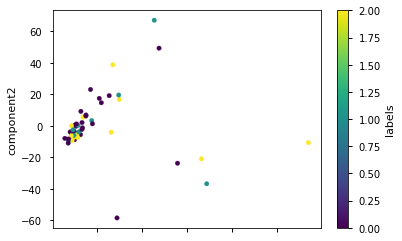

In [23]:
_=df_pca.plot.scatter(x="component1", y="component2", c="labels", cmap="viridis")

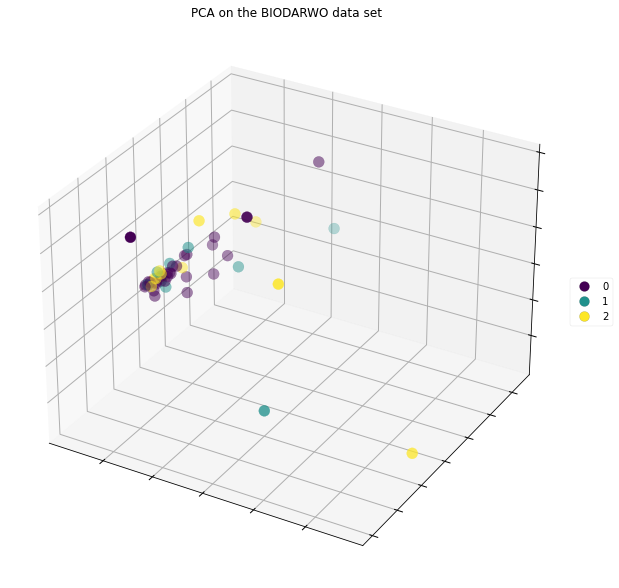

In [24]:
# Plot initialisation
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_pca['component1'], 
           df_pca['component2'], 
           df_pca['component3'], c=df_pca.labels, cmap="viridis", s=120)
    
# label the axes
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")

ax.set_xticklabels("")
ax.set_yticklabels("")
ax.set_zticklabels("")

colors = [sc.cmap(sc.norm(i)) for i in [0.0, 1.0, 2.0]]

custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                mec='k', mfc=c, mew=.1, ms=20) for c in colors]

ax.legend(custom_lines, ['0','1', '2'], loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_title("PCA on the BIODARWO data set")
plt.show()

In [25]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

score='accuracy'
X = X_train_lda
y = y_train

loo = LeaveOneOut()

In [26]:
# svm model
clf = SVC(kernel='rbf', gamma=1e-1, C=10**1)

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score svm: {}".format(cv['train_score'].mean()))
print("test score svm: {}".format(cv['test_score'].mean()))

train score svm: 0.94
test score svm: 0.9


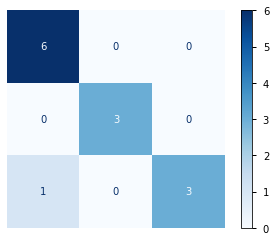

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
_=plt.axis('off')

In [28]:
# RandomForest
clf = RandomForestClassifier(n_estimators=30, random_state=38)

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score RandomForest: {}".format(cv['train_score'].mean()))
print("test score RandomForest: {}".format(cv['test_score'].mean()))

train score RandomForest: 1.0
test score RandomForest: 0.88


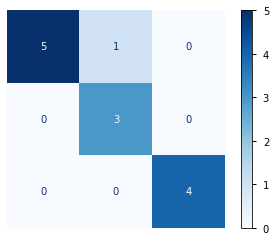

In [29]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
_=plt.axis('off')

In [30]:
# Knn
clf = KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree', metric='euclidean')

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score Knn: {}".format(cv['train_score'].mean()))
print("test score Knn: {}".format(cv['test_score'].mean()))

train score Knn: 0.9391836734693877
test score Knn: 0.92


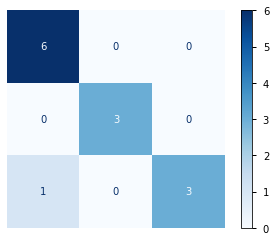

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
_=plt.axis('off')

In [32]:
# predictive model
clf = LDA()

cv = cross_validate(clf, X, y, cv=5, scoring=score, return_train_score=True, n_jobs=-1)
print("train score svm")
print(cv['train_score'].mean())
print("test score svm")
print(cv['test_score'].mean())

train score svm
0.9349999999999999
test score svm
0.9


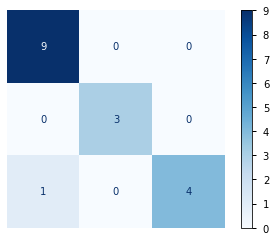

In [33]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38, test_size=0.33)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
_=plt.axis('off')